#Import Libraries

In [370]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import Dataset

In [371]:
df = pd.read_csv('https://raw.githubusercontent.com/willyrizkiyan/Pregnant-Liquor/main/Data%20Process.csv', sep=';')

In [372]:
df.head()

,Al2O3_Bauxite,Fe2O3_Bauxite,T-SiO2_Bauxite,R-SiO2_Bauxite,TiO2_Bauxite,LOI_Bauxite,THA_Bauxite,Average_MC_RM,F-NaOH_Spend_Liquor,A/C_Spend_Liquor,...,F-NaOH_BOS,A/C_BOS,SiO2_BOS,SC_BOS,F-NaOH_PFS_Filtrate,A/C_PFS_Filtrate,F-NaOH_Pregnant_Liquor,A/C_Pregnant_Liquor,Na2CO3_Pregnant_Liquor,F/T-NaOH_Pregnant_Liquor
0,51.4407,13.14860,12.00000,3.4719,1.36600,26.75000,45.753477,12.8,150.8,0.447,...,145.1,0.849,0.647,31.91,137.3,0.858,146.3,0.813,36.4,81.301196
1,51.4407,13.14860,12.00000,3.4719,1.36600,26.75000,45.753477,14.4,150.8,0.454,...,148.5,0.867,0.357,8.60,139.5,0.520,148.5,0.845,37.0,81.276434
2,51.4407,13.14860,12.00000,3.4719,1.36600,26.75000,45.753477,12.0,161.9,0.432,...,166.0,0.843,0.267,40.67,148.7,0.788,154.5,0.797,38.5,81.266493
3,51.4407,13.14860,12.00000,3.4719,1.36600,26.75000,45.753477,13.6,149.8,0.469,...,153.2,0.836,0.483,50.64,140.9,0.819,144.8,0.834,36.1,81.266053
4,47.9181,14.27375,10.34535,3.0322,1.28805,26.03435,42.532584,16.3,143.1,0.490,...,143.1,0.816,0.424,41.00,136.6,0.798,144.2,0.799,35.9,81.289249


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Al2O3_Bauxite             831 non-null    float64
 1   Fe2O3_Bauxite             831 non-null    float64
 2   T-SiO2_Bauxite            831 non-null    float64
 3   R-SiO2_Bauxite            831 non-null    float64
 4   TiO2_Bauxite              831 non-null    float64
 5   LOI_Bauxite               831 non-null    float64
 6   THA_Bauxite               831 non-null    float64
 7   Average_MC_RM             720 non-null    float64
 8   F-NaOH_Spend_Liquor       805 non-null    float64
 9   A/C_Spend_Liquor          805 non-null    float64
 10  SC_Spend_Liquor           789 non-null    float64
 11  F-NaOH_SLE_Outlet         624 non-null    float64
 12  A/C_SLE_Outlet            624 non-null    float64
 13  F-NaOH_BDH-P-102          802 non-null    float64
 14  A/C_BDH-P-

# Drop NA and Duplicated

In [374]:
df = df.dropna()

In [375]:
df = df.drop_duplicates()

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 792
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Al2O3_Bauxite             486 non-null    float64
 1   Fe2O3_Bauxite             486 non-null    float64
 2   T-SiO2_Bauxite            486 non-null    float64
 3   R-SiO2_Bauxite            486 non-null    float64
 4   TiO2_Bauxite              486 non-null    float64
 5   LOI_Bauxite               486 non-null    float64
 6   THA_Bauxite               486 non-null    float64
 7   Average_MC_RM             486 non-null    float64
 8   F-NaOH_Spend_Liquor       486 non-null    float64
 9   A/C_Spend_Liquor          486 non-null    float64
 10  SC_Spend_Liquor           486 non-null    float64
 11  F-NaOH_SLE_Outlet         486 non-null    float64
 12  A/C_SLE_Outlet            486 non-null    float64
 13  F-NaOH_BDH-P-102          486 non-null    float64
 14  A/C_BDH-P-

Good

# Split Data : Train - Validation - Test

In [377]:
from sklearn.model_selection import train_test_split

feature = df.drop(columns='F-NaOH_Pregnant_Liquor')
target = df[['F-NaOH_Pregnant_Liquor']]

feature_liquor_pretrain, feature_liquor_test, target_liquor_pretrain, target_liquor_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_liquor_train, feature_liquor_validation, target_liquor_train, target_liquor_validation = train_test_split(feature_liquor_pretrain, target_liquor_pretrain, test_size=0.20, random_state=42)

# Multicollinearity Study

In [378]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_liquor_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,Al2O3_Bauxite,1.437377e+08
2,Fe2O3_Bauxite,7.331809e+06
3,T-SiO2_Bauxite,2.206501e+00
4,R-SiO2_Bauxite,1.610244e+08
5,TiO2_Bauxite,2.572533e+00
6,LOI_Bauxite,1.329207e+00
7,THA_Bauxite,2.769707e+08
8,Average_MC_RM,1.145304e+00
9,F-NaOH_Spend_Liquor,2.227562e+00
10,A/C_Spend_Liquor,3.074687e+00


Observation:
* VIF Score for `Al2O3_Bauxite`, `Fe2O3_Bauxite`, `R-SiO2_Bauxite`, `THA_Bauxite` are high.
* Let's check multicollinearity on heatmap correlation.

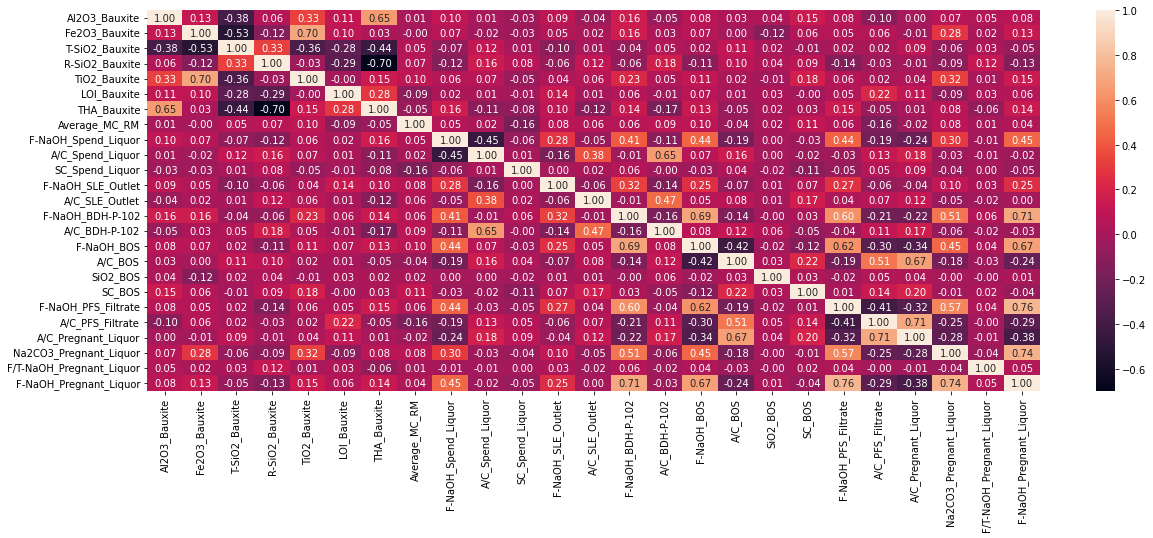

In [379]:
# heatmap correlation
liquor_train = pd.concat([feature_liquor_train, target_liquor_train], axis=1)
corr = liquor_train.corr()

plt.figure(figsize=(20,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Observation:
* `Al2O3` is lowest correlated with target variable. So we decide to drop `Al2O3` column.

## Drop Multicollinear Features

In [380]:
feature_liquor_train = feature_liquor_train.drop(columns=['Al2O3_Bauxite'])
feature_liquor_validation = feature_liquor_validation.drop(columns=['Al2O3_Bauxite'])
feature_liquor_test = feature_liquor_test.drop(columns=['Al2O3_Bauxite'])

# Recheck VIF

In [381]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_liquor_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,Fe2O3_Bauxite,3.192370
2,T-SiO2_Bauxite,2.202995
3,R-SiO2_Bauxite,2.456276
4,TiO2_Bauxite,2.571758
5,LOI_Bauxite,1.325018
6,THA_Bauxite,3.059070
7,Average_MC_RM,1.142344
8,F-NaOH_Spend_Liquor,2.227549
9,A/C_Spend_Liquor,3.072957
10,SC_Spend_Liquor,1.104283


Good

# Linear Regression

## Model Training

In [382]:
from sklearn.linear_model import LinearRegression

# define the model
linear_reg = LinearRegression()

# train the model
X_liquor_train = feature_liquor_train.to_numpy()
y_liquor_train = target_liquor_train.to_numpy()

linear_reg.fit(X_liquor_train, y_liquor_train)

LinearRegression()

In [383]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_liquor_train
model = linear_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,5.024827
1,Fe2O3_Bauxite,-0.257750
2,T-SiO2_Bauxite,-0.152889
3,R-SiO2_Bauxite,-0.193299
4,TiO2_Bauxite,-2.010209
5,LOI_Bauxite,0.057629
6,THA_Bauxite,-0.090476
7,Average_MC_RM,-0.071322
8,F-NaOH_Spend_Liquor,0.026701
9,A/C_Spend_Liquor,-2.470938


## Model Diagnostic

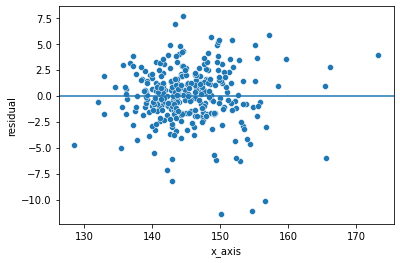

In [384]:
# calculate residuals
y_predict_train = linear_reg.predict(X_liquor_train)
residual = y_liquor_train - y_predict_train

#preprocess shape
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

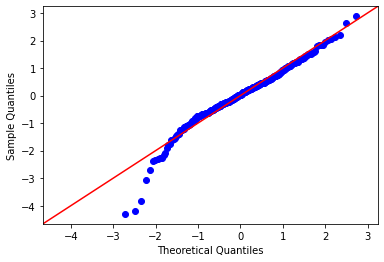

In [385]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

Assumption:
1. Linear relationships OK. The horizontal line y=0 is sufficient to represent the entire residual point.
2. Variance stable: NO. The variation is from small (on the left) to wide (on the right).
3. Independent residuals: OK. There is no conspicuous pattern in the adjacent residuals.
4. Residuals distribution: OK. Mostly residuals are normally distributed.

## Model Evaluation

### Training Error

In [386]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_liquor_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_liquor_train))))

R-squared for training data is 0.7782436133696946
RMSE for training data is 2.650734921553442


### Testing Error

In [387]:
# prepare prediction result on test data
X_liquor_test = feature_liquor_test.to_numpy()
y_predict_test = linear_reg.predict(X_liquor_test)

# ground truth target
y_liquor_test = target_liquor_test.to_numpy()

In [388]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_liquor_test))))

RMSE for testing data is 4.296471568876249


Interpretation:

77.82% of variability of F-NaOH Pregnant Liquor is successfully explained
using all the features in the model.

The standard deviation of prediction errors is 4.296. i.e. from the regression line, the residuals mostly deviate between +- 4.296.

# Ridge Regression

## Train Multiple Models

In [389]:
from sklearn.linear_model import Ridge

# train the model
X_liquor_train = feature_liquor_train.to_numpy()
y_liquor_train = target_liquor_train.to_numpy()
y_liquor_train = y_liquor_train.reshape(len(y_liquor_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_liquor_train, y_liquor_train)
ridge_reg_pointone.fit(X_liquor_train, y_liquor_train)
ridge_reg_one.fit(X_liquor_train, y_liquor_train)
ridge_reg_ten.fit(X_liquor_train, y_liquor_train)

Ridge(alpha=10, random_state=42)

## Find Best Model

In [390]:
from sklearn.metrics import mean_squared_error

X_liquor_validation = feature_liquor_validation.to_numpy()
y_liquor_validation = target_liquor_validation.to_numpy()
y_liquor_validation = y_liquor_validation.reshape(len(y_liquor_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_liquor_validation)
    rmse = np.sqrt(mean_squared_error(y_liquor_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 2.904707562077692
RMSE of Ridge regression model with alpha = 0.1 is 2.9196623799916877
RMSE of Ridge regression model with alpha = 1.0 is 3.0744600575779746
RMSE of Ridge regression model with alpha = 10 is 3.1718953898103073


The smallest RMSE is alpha = 0.01

## Model Evaluation

In [391]:
ridge_best = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_liquor_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,5.460444
1,Fe2O3_Bauxite,-0.255307
2,T-SiO2_Bauxite,-0.155972
3,R-SiO2_Bauxite,-0.191480
4,TiO2_Bauxite,-2.026924
5,LOI_Bauxite,0.058032
6,THA_Bauxite,-0.097556
7,Average_MC_RM,-0.071386
8,F-NaOH_Spend_Liquor,0.028876
9,A/C_Spend_Liquor,-1.637450


### Diagnostics Study

In [392]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_liquor_train)

print('R-squared for training data is {}'.format(r2_score(y_liquor_train, y_predict_train)))

R-squared for training data is 0.8184592897491292


### Training Error

In [393]:
# prepare prediction result on train data
X_liquor_train = feature_liquor_train.to_numpy()
y_predict_train = ridge_best.predict(X_liquor_train)

# ground truth target
y_liquor_train = target_liquor_train.to_numpy()
y_liquor_train = y_liquor_train.reshape(len(y_liquor_train),)

In [394]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_liquor_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_liquor_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_liquor_train, y_predict_train)))

RMSE for training data is 2.6509867403985945
MAE for training data is 1.9604909000680473
MAPE for training data is 0.013473540667462603


### Testing Error

In [395]:
# prepare prediction result on test data
X_liquor_test = feature_liquor_test.to_numpy()
y_predict_test = ridge_best.predict(X_liquor_test)

# ground truth target
y_liquor_test = target_liquor_test.to_numpy()
y_liquor_test = y_liquor_test.reshape(len(y_liquor_test),)

In [396]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_liquor_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_liquor_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_liquor_test, y_predict_test)))

RMSE for testing data is 4.301942180361469
MAE for testing data is 2.696111683606595
MAPE for testing data is 0.01848777922621664


## Interpretation

Summary:
Just Right

MAPE on training data is about 1.34% and 1.84% for testing data.

MAPE on training data indicates that it is not underfit.
MAPE on test data indicates that it is also not overfit.

From test data, the standard deviation of prediction errors is 4.302. i.e. from the regression line, the residuals mostly deviate between +- 4.302.

On average, our prediction deviates the true F-NaOH Pregnant Liquor by 2.696. Moreover, this 2.696 is equivalent to 1.84% deviation relative to the medv.

# Lasso Regression

## Train Multiple Models

In [397]:
from sklearn.linear_model import Lasso

# train the model
X_liquor_train = feature_liquor_train.to_numpy()
y_liquor_train = target_liquor_train.to_numpy()
y_liquor_train = y_liquor_train.reshape(len(y_liquor_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_liquor_train, y_liquor_train)
lasso_reg_pointone.fit(X_liquor_train, y_liquor_train)
lasso_reg_one.fit(X_liquor_train, y_liquor_train)
lasso_reg_ten.fit(X_liquor_train, y_liquor_train)

Lasso(alpha=10, random_state=42)

## Find Best Model

In [398]:
from sklearn.metrics import mean_squared_error

X_liquor_validation = feature_liquor_validation.to_numpy()
y_liquor_validation = target_liquor_validation.to_numpy()
y_liquor_validation = y_liquor_validation.reshape(len(y_liquor_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_liquor_validation)
    rmse = np.sqrt(mean_squared_error(y_liquor_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 3.089925135016759
RMSE of Lasso regression model with alpha = 0.1 is 3.160643350901945
RMSE of Lasso regression model with alpha = 1.0 is 3.3353257663397797
RMSE of Lasso regression model with alpha = 10 is 4.576470610480309


The smallest RMSE is alpha = 0.01

## Model Evaluation

In [399]:
lasso_best = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_liquor_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,14.213007
1,Fe2O3_Bauxite,-0.271085
2,T-SiO2_Bauxite,-0.184537
3,R-SiO2_Bauxite,-0.134315
4,TiO2_Bauxite,-1.361542
5,LOI_Bauxite,0.075321
6,THA_Bauxite,-0.202453
7,Average_MC_RM,-0.092051
8,F-NaOH_Spend_Liquor,0.035052
9,A/C_Spend_Liquor,0.000000


### Diagnostics Study

In [400]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_liquor_train)

print('R-squared for training data is {}'.format(r2_score(y_liquor_train, y_predict_train)))

R-squared for training data is 0.8093027633220724


### Training Error

In [401]:
# prepare prediction result on train data
X_liquor_train = feature_liquor_train.to_numpy()
y_predict_train = lasso_best.predict(X_liquor_train)

# ground truth target
y_liquor_train = target_liquor_train.to_numpy()
y_liquor_train = y_liquor_train.reshape(len(y_liquor_train),)

In [402]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_liquor_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_liquor_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_liquor_train, y_predict_train)))

RMSE for training data is 2.7170194060503845
MAE for training data is 2.0039640155287093
MAPE for training data is 0.013760221798420501


### Testing Error

In [403]:
# prepare prediction result on test data
X_liquor_test = feature_liquor_test.to_numpy()
y_predict_test = lasso_best.predict(X_liquor_test)

# ground truth target
y_liquor_test = target_liquor_test.to_numpy()
y_liquor_test = y_liquor_test.reshape(len(y_liquor_test),)

In [404]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_liquor_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_liquor_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_liquor_test, y_predict_test)))

RMSE for testing data is 4.454358573252794
MAE for testing data is 2.8144253049380517
MAPE for testing data is 0.019290202647571923


## Interpretation

Summary:
Just Right

MAPE on training data is about 1.37% and 1.92% for testing data.

MAPE on training data indicates that it is not underfit.
MAPE on test data indicates that it is also not overfit.

From test data, the standard deviation of prediction errors is 4.454. i.e. from the regression line, the residuals mostly deviate between +- 4.454.

On average, our prediction deviates the true F-NaOH Pregnant Liquor by 2.814. Moreover, this 2.814 is equivalent to 1.92% deviation relative to the medv.

# Summary

R-squared for ridge model on training data is 77.82%

R-squared for ridge model on training data is 81.85%

R-squared for lasso model on training data is 80.93%

Both of ridge and lasso model are just right. Not underfit or overfit.

Best model is ridge model due to 81.85% of variability of F-NaOH Pregnant Liquor is successfully explained using all the features in the model.